# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [2]:
penguins = penguins.dropna()
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object))
    ],
  remainder = "passthrough")

In [3]:
#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

crossval1 = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2').mean()


In [4]:
#K Nearest Neighbors
knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsRegressor(n_neighbors=5))]
)

crossval2 = cross_val_score(knn_pipeline, X, y, cv=5, scoring='r2').mean()

In [5]:
#K Nearest Neighbors
knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsRegressor(n_neighbors=10))]
)

crossval3 = cross_val_score(knn_pipeline, X, y, cv=5, scoring='r2').mean()

In [6]:
#Decision tree model
tree_pipeline = Pipeline(
  [("preprocessing", ct),
  ("tree", DecisionTreeRegressor(max_depth=5))]
)

crossval4 = cross_val_score(tree_pipeline, X, y, cv=5, scoring='r2').mean()

In [7]:
#Plot R Squared
df_errors = []
df_errors.append({
    "Model" : 1,
    "R Squared" : crossval1,
    "Flexibility": 7
})
df_errors

[{'Model': 1, 'R Squared': 0.3948378362912731, 'Flexibility': 7}]

In [8]:
df_errors.append({
    "Model" : 2,
    "R Squared" : crossval2,
    "Flexibility": 5
})
df_errors

[{'Model': 1, 'R Squared': 0.3948378362912731, 'Flexibility': 7},
 {'Model': 2, 'R Squared': -1.1799492368659934, 'Flexibility': 5}]

In [9]:
df_errors.append({
    "Model" : 3,
    "R Squared" : crossval3,
    "Flexibility": 10
})
df_errors

[{'Model': 1, 'R Squared': 0.3948378362912731, 'Flexibility': 7},
 {'Model': 2, 'R Squared': -1.1799492368659934, 'Flexibility': 5},
 {'Model': 3, 'R Squared': -1.0702102719843694, 'Flexibility': 10}]

In [10]:
df_errors.append({
    "Model" : 4,
    "R Squared" : crossval4,
    "Flexibility": 5
})
df_errors

[{'Model': 1, 'R Squared': 0.3948378362912731, 'Flexibility': 7},
 {'Model': 2, 'R Squared': -1.1799492368659934, 'Flexibility': 5},
 {'Model': 3, 'R Squared': -1.0702102719843694, 'Flexibility': 10},
 {'Model': 4, 'R Squared': 0.2587966596084759, 'Flexibility': 5}]

In [11]:
df_errors = pd.DataFrame(df_errors)
df_errors

,Model,R Squared,Flexibility
0,1,0.394838,7
1,2,-1.179949,5
2,3,-1.070210,10
3,4,0.258797,5


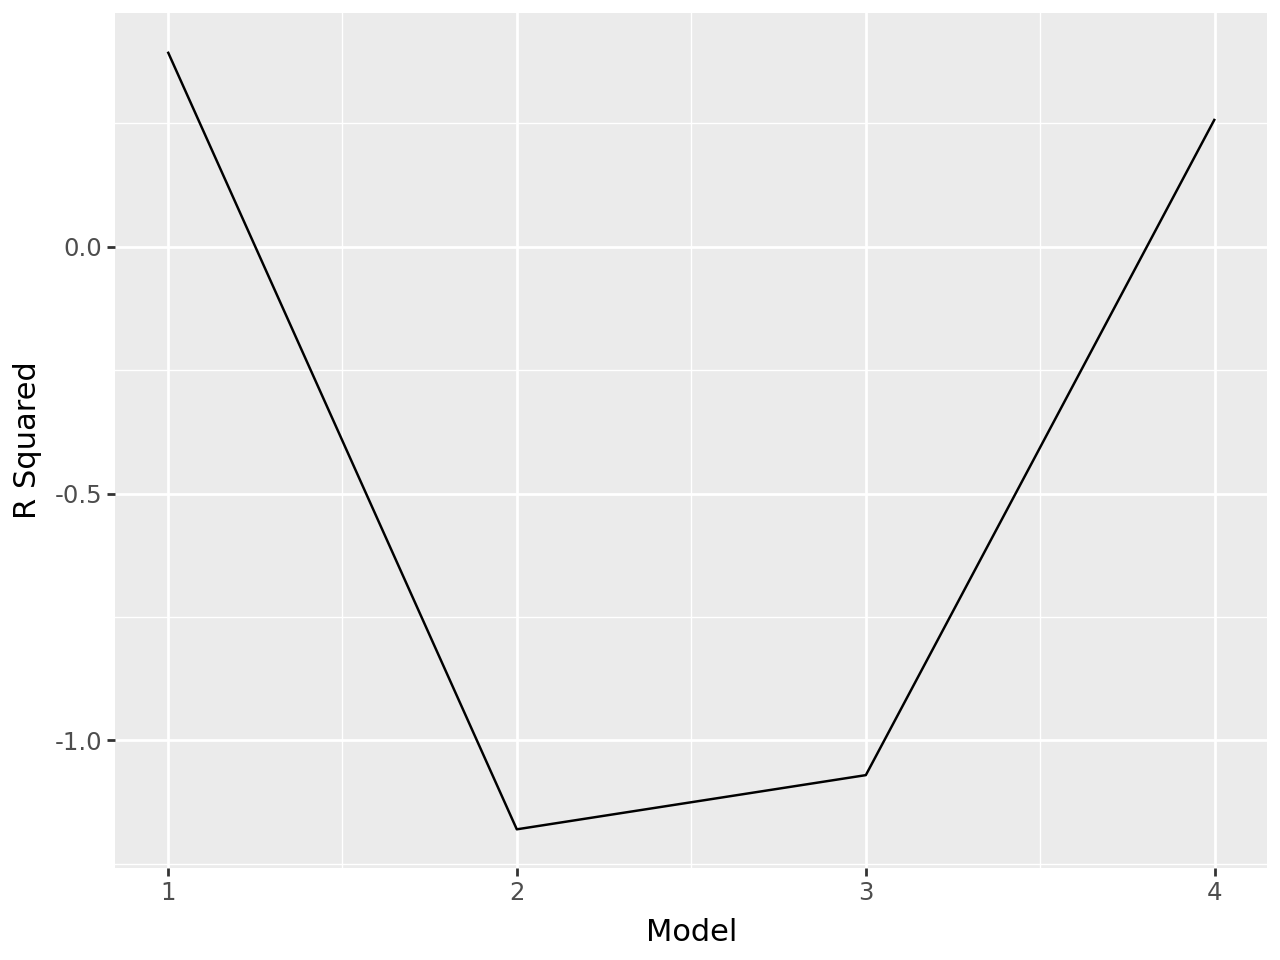

In [12]:
from plotnine import ggplot, aes, geom_line, labs

(ggplot(df_errors, aes(x='Model', y='R Squared')) +
  geom_line() )
  #+ geom_line(aes(y='Test MSE'), color='red'))

Based on this plot, Model 1 is the best because it has the highest R Squared.